# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


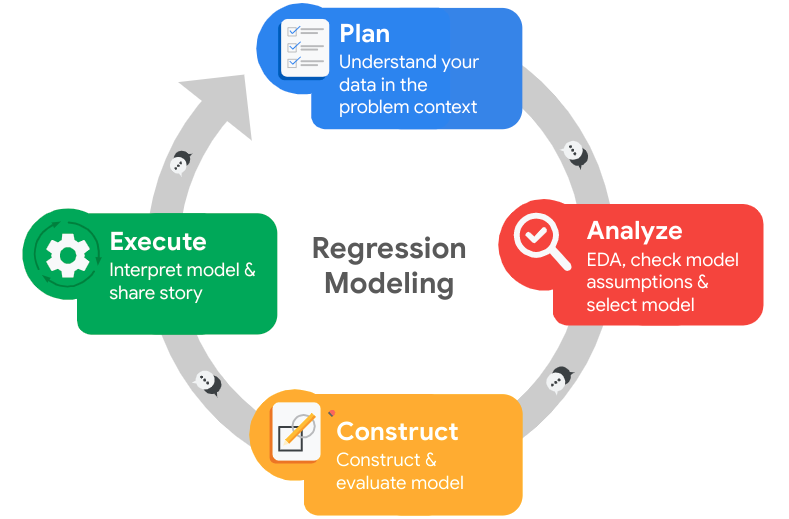

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Salifort Motors are the stakeholders for this project.
2. The objective is to reduce the turnover of employees.
3. There are some outliers in "time_spent_company" and "work_accident". The outlier for "time_spent_company" is fairly small percent which makes sense as the outliers include employees who just joined and who are in senior position and have stayed for a long time. Work related accident is 15% which might be something worth looking into.
4. Google and resources for libraries along with chatGPT.
5. None of the features in the dataset tend to suggest anything unethical since the goal is to retain employees and not fire them. However, the results of this projects should make sure to use positive or neutral reinforcements to retain employees.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Importing packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.** 

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.shape



(14999, 10)

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### checking classes with categorical data and distribution of data within those classes

In [5]:
df0["Department"].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [6]:
df0["salary"].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [7]:
df0["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

The data is fairly unbalanced. So, logistic regression may not perform very well.

### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names

df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
# Rename columns as needed
#Coverting column names to have lower case
df0.columns = [col.lower() for col in df0.columns]

df0.rename(columns={'average_montly_hours':'average_monthly_hours'}, inplace=True)



In [11]:
# new column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values

#Make a vector of rows where any column has missing values
mask = df0.isna().any(axis=1)
df0[mask]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary


This shows that there are no missing data in any rows/columns.

### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
duplicate = df0.duplicated() #for a boolean for duplicate rows


In [14]:
# Inspect some rows containing duplicates as needed
df0[duplicate].sort_values(by=df0.columns.to_list())

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13283,1.00,0.86,2,264,3,0,0,0,IT,medium
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
13089,1.00,0.88,6,201,4,0,0,0,technical,low
13586,1.00,0.93,5,167,3,0,0,0,sales,medium


Since there are multiple features, it is unlikely that the duplicates is due to different employees having same features. So, we will remove the duplicates.

In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

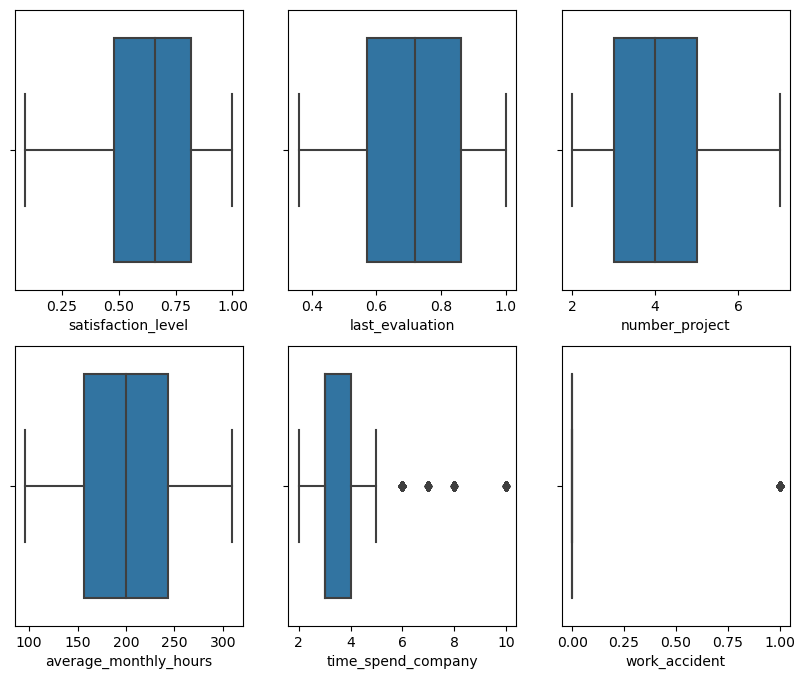

In [16]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig, axes = plt.subplots(2,3,figsize = (10,8))
axes =axes.flatten()
sns.boxplot(x = df1["satisfaction_level"], ax= axes[0])
sns.boxplot(x = df1["last_evaluation"], ax=axes[1])
sns.boxplot(x = df1["number_project"], ax=axes[2])
sns.boxplot(x = df1["average_monthly_hours"], ax=axes[3])
sns.boxplot(x = df1["time_spend_company"], ax=axes[4])
sns.boxplot(x = df1["work_accident"], ax=axes[5]);





In [17]:
# Rows containing outliers for "time_spend_company"
Q1 = df1["time_spend_company"].quantile(0.25)
Q3 = df1["time_spend_company"].quantile(0.75)
IQR = Q3-Q1

lower_threshold = Q1 - 1.5*IQR
upper_threshold = Q3 + 1.5*IQR

outliers_time_spent = df1[(df1['time_spend_company'] < lower_threshold) | (df1['time_spend_company'] > upper_threshold)]
outliers_time_spent

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [18]:
# Rows containing outliers for "work_accident"
Q1 = df1["work_accident"].quantile(0.25)
Q3 = df1["work_accident"].quantile(0.75)
IQR = Q3-Q1

lower_threshold = Q1 - 1.5*IQR
upper_threshold = Q3 + 1.5*IQR

outliers_accident = df1[(df1['work_accident'] < lower_threshold) | (df1['work_accident'] > upper_threshold)]
outliers_accident

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
18,0.45,0.51,2,160,3,1,1,1,sales,low
68,0.76,0.86,5,223,5,1,1,0,product_mng,medium
120,0.14,0.62,4,158,4,1,1,0,technical,low
123,0.11,0.84,6,300,5,1,1,0,support,low
136,0.10,0.84,6,283,4,1,1,0,technical,low
...,...,...,...,...,...,...,...,...,...,...
11977,0.62,0.72,3,149,3,1,0,0,marketing,medium
11979,0.52,0.55,5,174,3,1,0,0,sales,medium
11984,0.52,0.61,4,187,4,1,0,0,sales,medium
11992,0.62,0.85,3,237,3,1,0,0,IT,medium


In [19]:
df1["work_accident"].value_counts(normalize=True)

work_accident
0    0.845718
1    0.154282
Name: proportion, dtype: float64

We see that about 15% of the employees had work related accident.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [20]:
# Get numbers of people who left vs. stayed

left_number = df1["left"].value_counts()
print("Number of Employees who stayed: ",left_number[0])
print("Number of Employees who left: ",left_number[1])

Number of Employees who stayed:  10000
Number of Employees who left:  1991


In [21]:
# Get percentages of people who left vs. stayed
left_percent = df1["left"].value_counts(normalize=True)*100
print("Percentage of Employees who stayed: ",left_percent[0])
print("Percentage of Employees who left: ",left_percent[1])



Percentage of Employees who stayed:  83.39588024351598
Percentage of Employees who left:  16.604119756484028


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


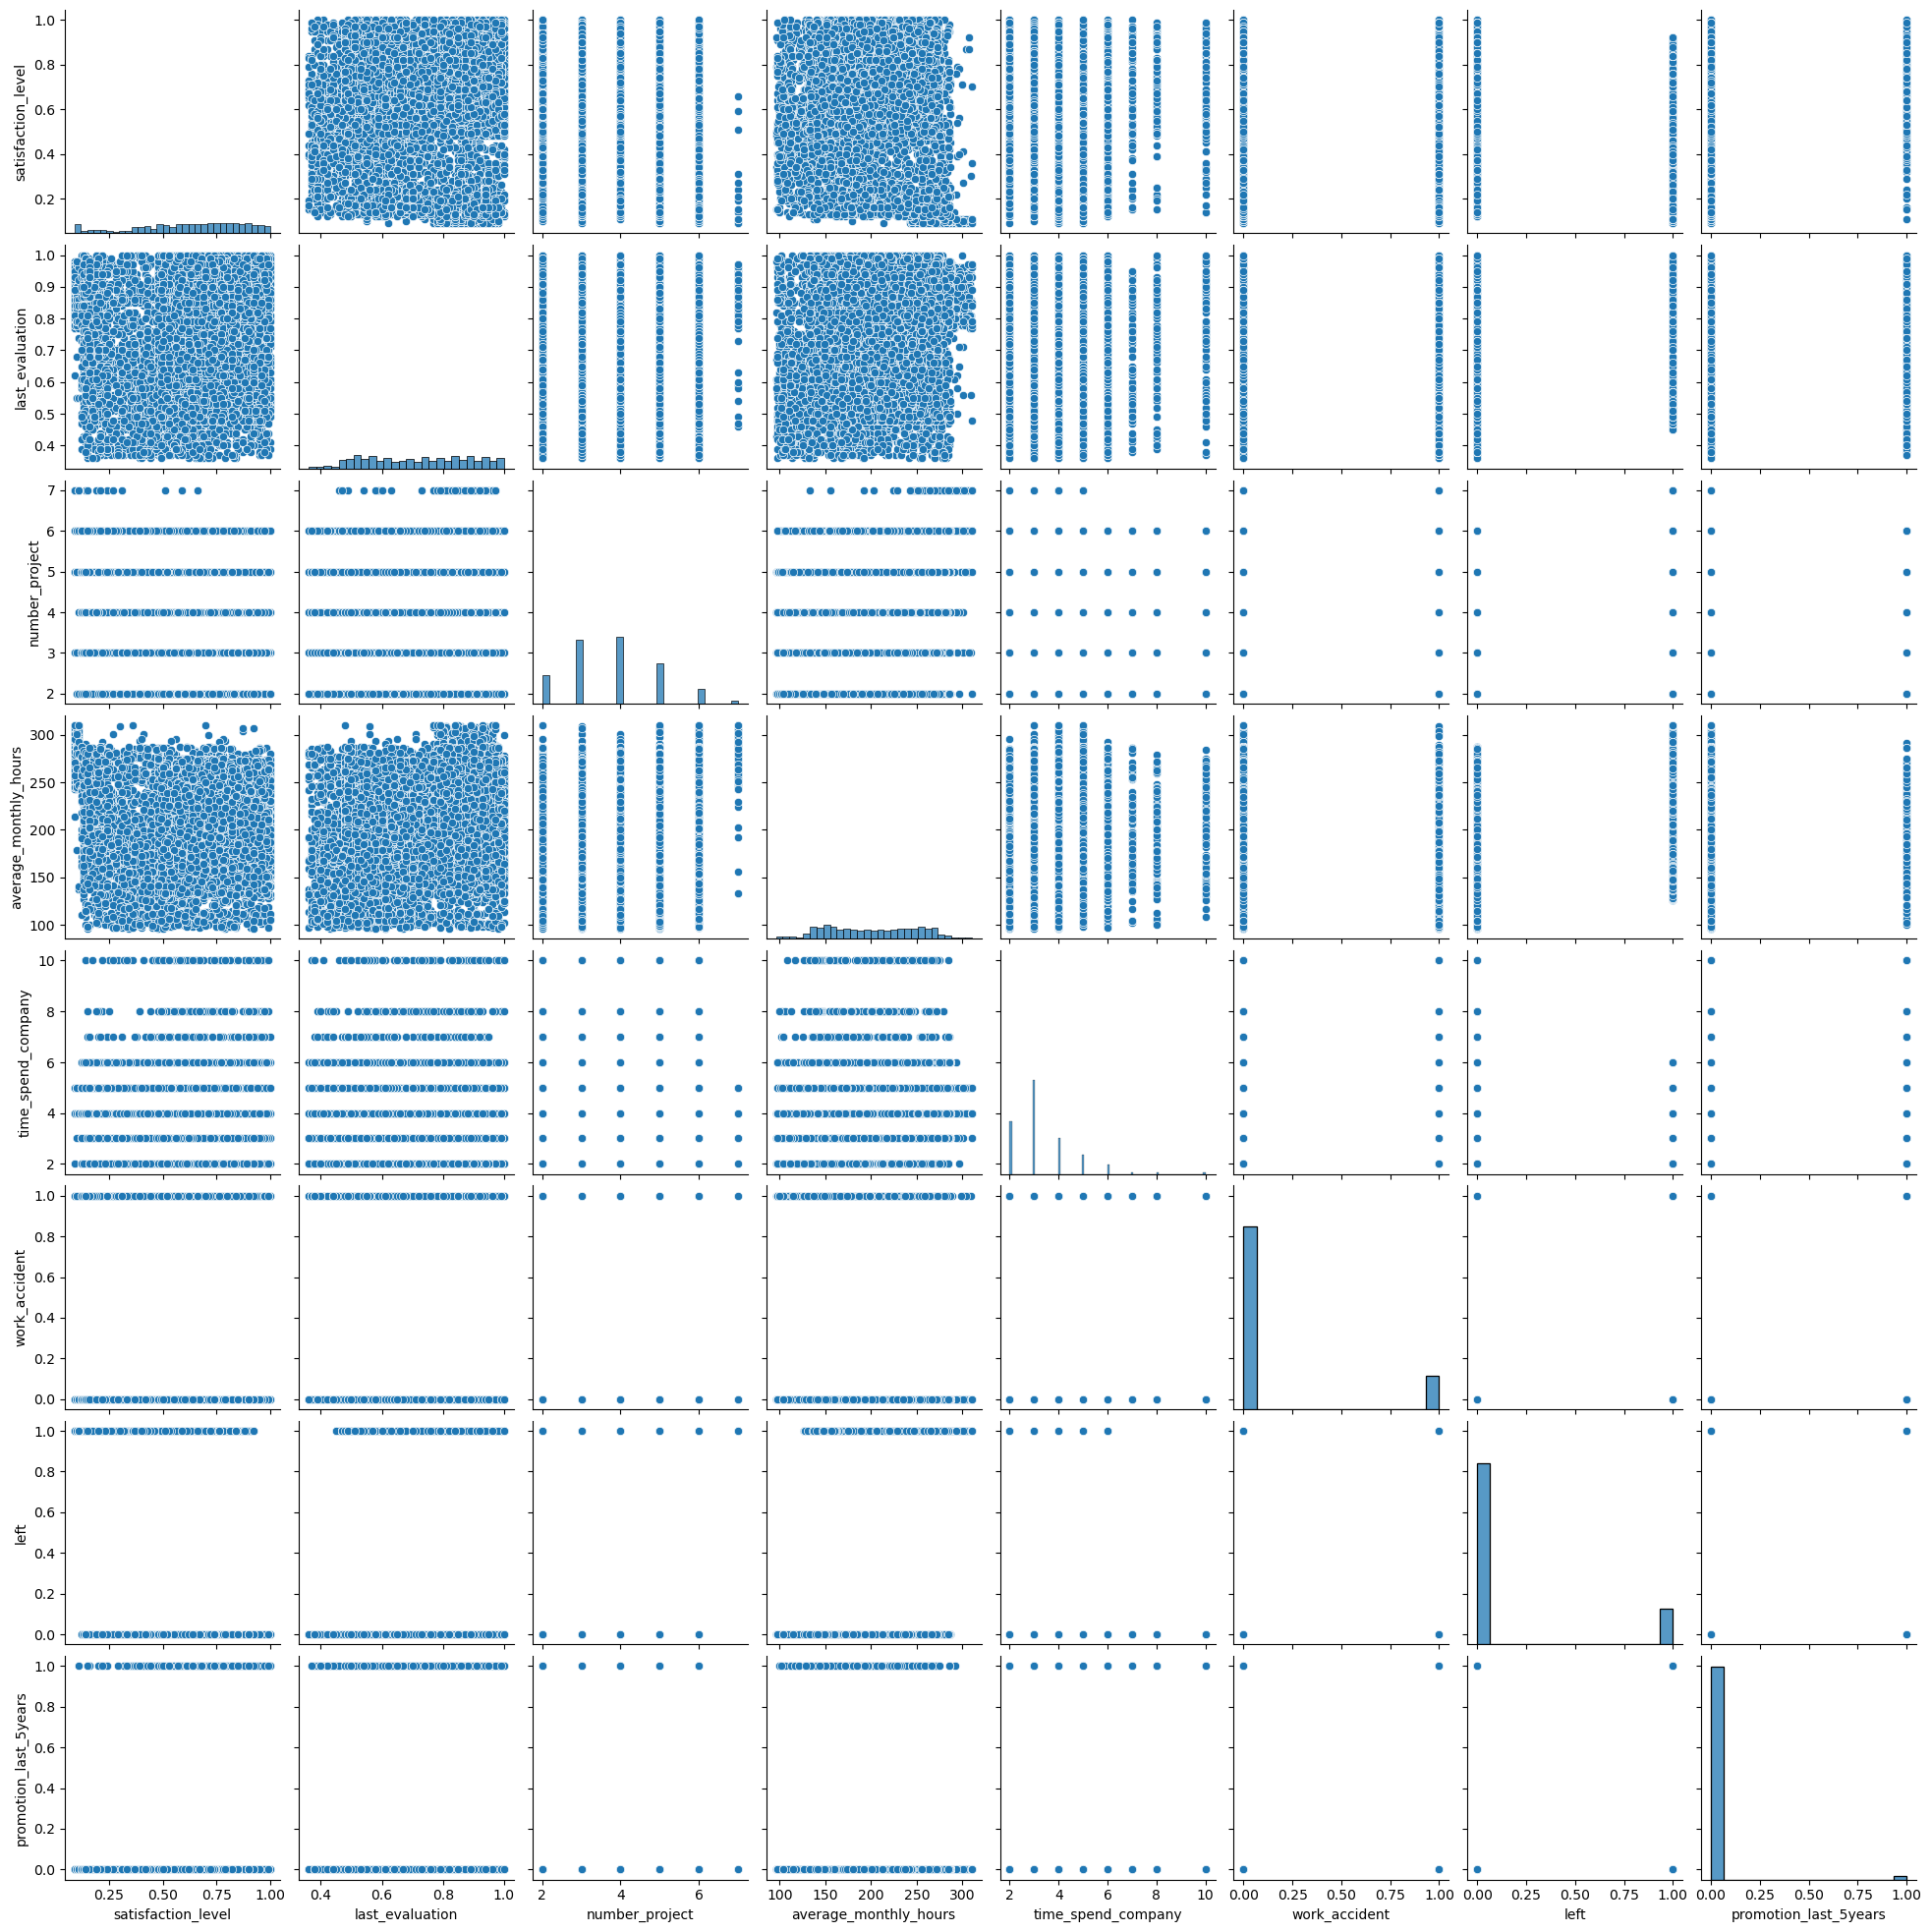

In [22]:
# Create a plot as needed
sns.pairplot(df1);

[Text(0, 0, 'Stayed'), Text(1, 0, 'Left')]

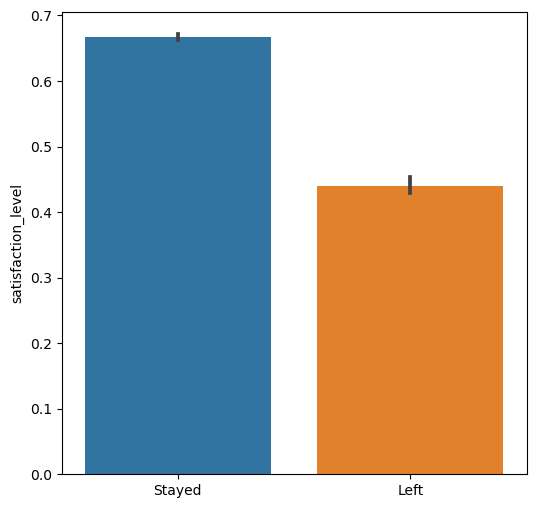

In [23]:
#"left" vs satisfaction_level
fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data = df1, x='left',y = 'satisfaction_level', ax = ax)
ax.set_xlabel(None)
ax.set_xticklabels(['Stayed', 'Left'])

[Text(0, 0, 'Stayed'), Text(1, 0, 'Left')]

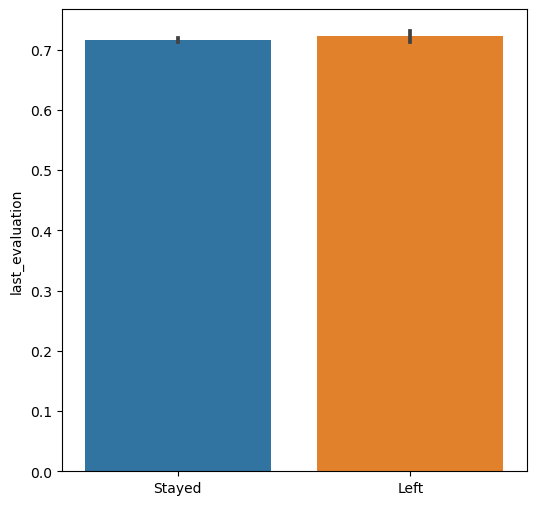

In [24]:
#"left" vs "last_evaluation"
fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data = df1, x='left',y = 'last_evaluation',ax = ax)
ax.set_xlabel(None)
ax.set_xticklabels(['Stayed', 'Left'])

[Text(0, 0, 'Stayed'), Text(1, 0, 'Left')]

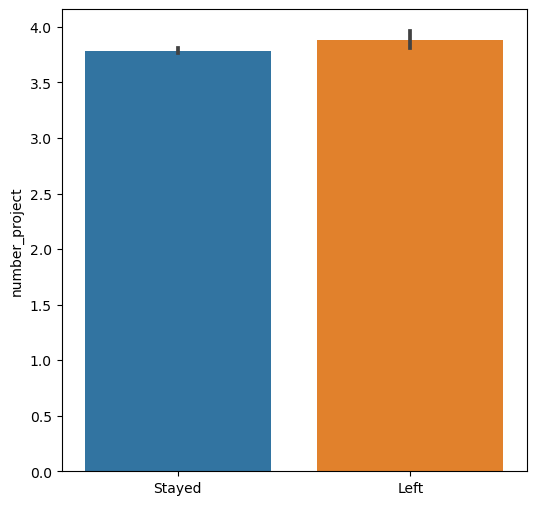

In [25]:
#"left" vs "number_project"
fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data = df1, x='left',y = 'number_project',ax = ax)
ax.set_xlabel(None)
ax.set_xticklabels(['Stayed', 'Left'])

[Text(0, 0, 'Stayed'), Text(1, 0, 'Left')]

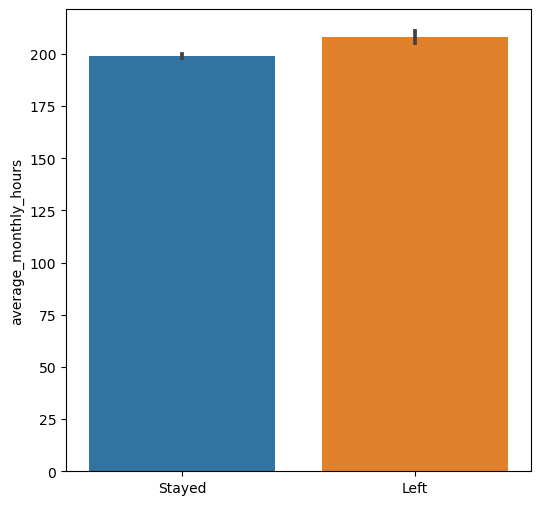

In [26]:
#"left" vs "average_monthly_hours"
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(data = df1, x='left',y = 'average_monthly_hours', ax = ax)
ax.set_xlabel(None)
ax.set_xticklabels(['Stayed', 'Left'])

[Text(0, 0, 'Stayed'), Text(1, 0, 'Left')]

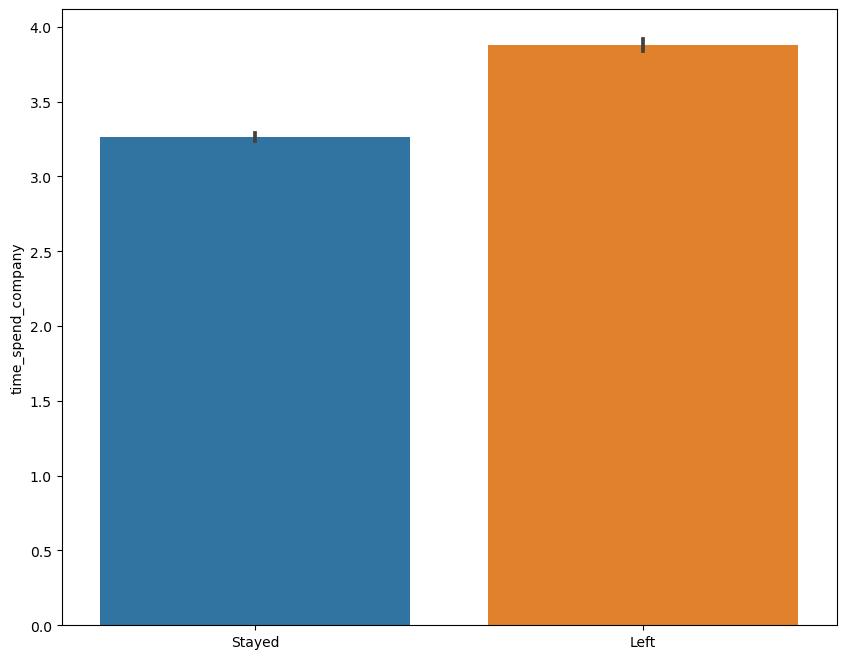

In [27]:
#"left" vs "time spent company"
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data = df1, x='left',y = 'time_spend_company', ax = ax)
ax.set_xlabel(None)
ax.set_xticklabels(['Stayed', 'Left'])

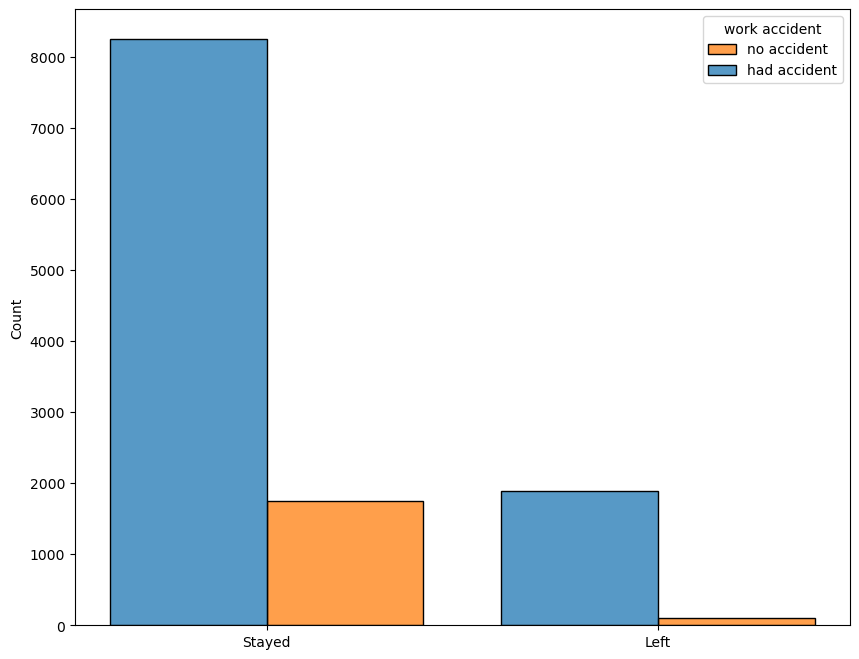

In [28]:
#"left" vs "work_accident"

#left vs salary
fig, ax = plt.subplots(figsize=(10, 8))

sns.histplot(x=df1['left'].astype('category'), hue = df1['work_accident'], stat= "count", multiple='dodge', shrink = 0.8, ax = ax)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Stayed', 'Left'])
ax.set_xlabel(None)
ax.legend(title = 'work accident', labels= ['no accident','had accident'])

Text(0.5, 1.0, 'Histogram of Department with Left Status')

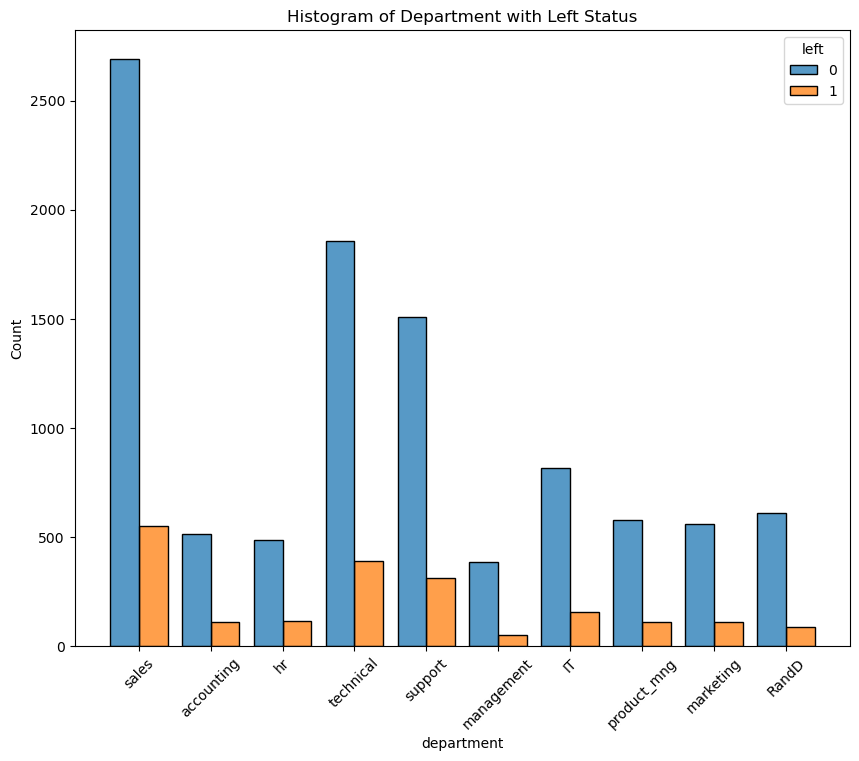

In [29]:
#left vs department
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(x=df1['department'], hue=df1['left'], stat="count", discrete=1, multiple='dodge', shrink=0.8, ax=ax)
ax.tick_params(axis='x', rotation=45)
ax.set_title("Histogram of Department with Left Status")  



Text(0.5, 0, '')

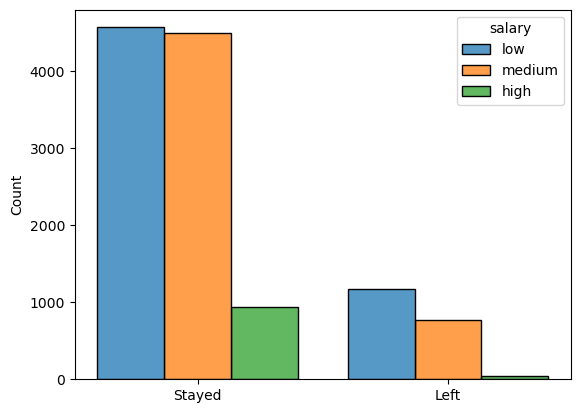

In [30]:
#left vs salary
ax = sns.histplot(x=df1['left'].astype('category'), hue = df1['salary'], stat= "count", multiple='dodge', shrink = 0.8)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Stayed', 'Left'])
ax.set_xlabel(None)


Text(0.5, 1.0, 'Correlation Heatmap')

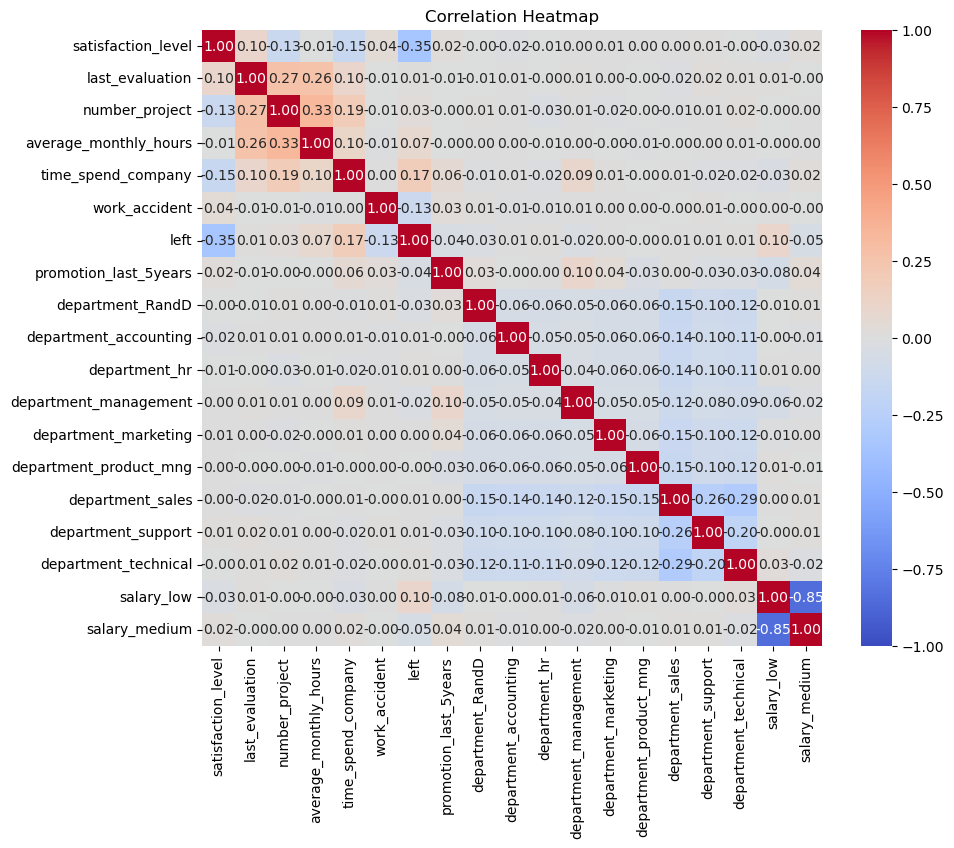

In [31]:
df_corr = pd.get_dummies(df1, columns=["department","salary"], drop_first = True)#convert department into categorical data columns with boolean values
corr_matrix = df_corr.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = ".2f", vmin = -1, vmax = 1)
ax.set_title("Correlation Heatmap")

### What did you observe about the relationships between variables?
- There are some variables that share higher coorelation such as "last_evaluation","number_of_project","avg_monthly_hours". 
- "left" variable has highest correlation with "satisfaction_level". 
- Employees who have spent very long time in the company, have low salary or had accidents at work are also more likely to leave.
- We also see that department related columns have almost no correlation with "left" feature. It may be a good idea to drop this column from training.

### What do you observe about the distributions in the data?
- We see that the data is fairly unbalanced in different categories on features. Given the nature of some of these features, this is expected.
- Outliers are present in feature related to how long employees have stayed in the company. These outliers are expected.

### What transformations did you make with your data? Why did you chose to make those decisions?
- Renamed columns to keep them cosistent and checked for any duplicate data or missing data. 

### What are some purposes of EDA before constructing a predictive model?
- To understand the distribution and characteristics of each features in the data provided.
- Detect any anamoly or outliers in the data that can affect our model negatively and deal with them.
- Fix any missing data entries so that it does not affect our model negatively.
- Helps in feature engineering and selection for modelling.
- Helps decide what modelling technique or algorithm may be appropriate to use

### What resources do you find yourself using as you complete this stage? 
- Documentation related to python libraries used in this project such as Pandas, Matplotlib, SKlearn, Searborn etc.

### Do you have any ethical considerations in this stage?
- Make sure that the data is not biased towards any particular category of people/employees that can lead to unfair treatment of certain employees due to trained model.
- Make sure to follow the guidelines of data privacy and ensure it is not misused.

### Insights

Satisfaction level and time spent in the company seem to be the strongest parameters to predict whether the employee would leave or not. The other features do not show strong correlation with employee who left.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

Since this data has binary predictions, models like logistic regression, Random Forest or XGboost since we have outliers in the data which we want to keep. Models like decision trees. Let's check logistic regression performance vs Random Forest since logistic regression can be moderately affected by outliers. However, if logistic regression is comparable to Random Forest, it will be our model for prediction since it is faster than Random Forest.

### Modeling Logistic Regression


In [32]:
from statsmodels.formula.api import logit
import statsmodels as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [33]:
df2 = df1.drop("department", axis = 1)

In [34]:
y = df2["left"]

In [35]:
X = df2.drop(["left"],axis=1)

In [36]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 0 )

In [37]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,low
1,0.80,0.86,5,262,6,0,0,medium
2,0.11,0.88,7,272,4,0,0,medium
3,0.72,0.87,5,223,5,0,0,low
4,0.37,0.52,2,159,3,0,0,low


In [38]:
df_train = pd.merge(X_train,y_train,
                    left_index=True, right_index=True )

In [39]:
df_test = pd.merge(X_test,y_test,left_index=True, right_index=True )

In [40]:
df_train.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,left
7342,0.75,0.76,3,246,3,0,0,medium,0
2034,0.82,0.79,4,224,2,0,0,low,0
7833,0.88,0.63,3,184,4,0,0,medium,0
5672,0.77,0.80,4,167,3,0,0,medium,0
8824,0.61,0.82,3,271,3,0,0,low,0
5729,0.78,0.67,4,221,3,1,0,low,0
179,0.11,0.85,6,308,5,0,0,medium,1
11826,0.81,0.81,5,250,4,0,1,medium,0
5647,0.64,0.63,5,105,5,1,0,low,0
11529,0.97,0.57,3,164,10,0,0,high,0


In [41]:
formula = 'left~satisfaction_level+last_evaluation+number_project+average_monthly_hours+time_spend_company+C(work_accident)+C(promotion_last_5years)+C(salary)'

In [42]:
model = logit(formula, data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.356881
         Iterations 7


In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9582
Method:                           MLE   Df Model:                            9
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.2062
Time:                        08:44:47   Log-Likelihood:                -3423.2
converged:                       True   LL-Null:                       -4312.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.9983      0.249     -8.014      0.000      -2.487      -1.510
C(work_accident)[T.1]            -1.5247      0.126    -12.058      0.000      -1.773      -1.277
C(promotion_last_5years)[T.1]    -1.4604      0.414     -3.530      0.000      -2.271      -0.650
C(salary)[T.low]                  1.9034      0.182     10.452      0.000       1.547       2.260
C(salary)[T.medium]               1.4458      0.183      7.892      0.000       1.087       1.805
satisfaction_level               -4.0581      0.136    -29.880      0.000      -4.324      -3.792
last_evaluation                   0.4631      0.201      2.300      0.021       0.068       0.858
number_project                   -0.2922      0.029    -10.086      0.000      -0.349      -0.235
average_monthly_hours             0.0042      0.001      6.011      0.000       0.003       0.006
time_spend_company                0.3176      0.023     14.025      0.000       0.273       0.362
=================================================================================================
"""

In [44]:
predicted_probablities = model.predict(X_test)

In [45]:
y_pred = (predicted_probablities > 0.5).astype(int)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8282617757398916
Precision: 0.4639175257731959
Recall: 0.22613065326633167
F1 Score: 0.30405405405405406


In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [48]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [49]:
conf_matrix

array([[1897,  104],
       [ 308,   90]], dtype=int64)

Text(45.722222222222214, 0.5, 'Actual')

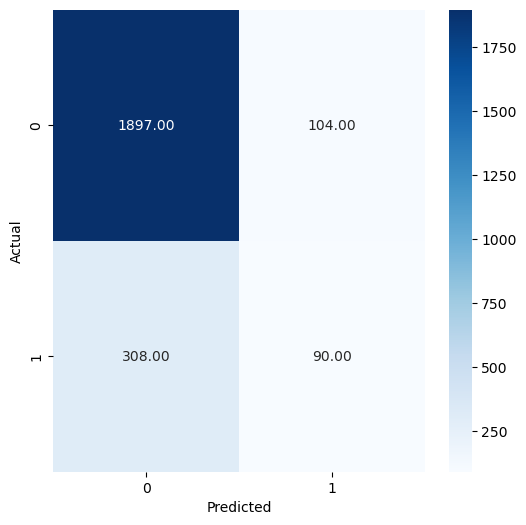

In [50]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(conf_matrix,annot=True, fmt='.2f', cmap = 'Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

## Reflecting on some important questions

### Anything odd?
- The Y categories is strongly skewed. So, logistic regression may not perform very well.

### Which independent variables did we choose for the model and why?
- We used all the variables except "department" since it appears to have almost 0 correlation with our output variable.

### Are each of the assumptions met?
- Outcome variable is categorical
- Observations are independent.
- Some extent of correlation between different variables which is not desirable.
- No extreme outliers
- Linear behavior between X variables and logit(Y).
- Sufficiently large size data

### How well does our model fit the data?
- Our model performs fairly well with 82.8% accuracy.

### Can you improve it? Is there anything you would change about the model?
- Some feature engineering or hyperparameter tuning could improve the model.


### Testing Random Foest 

We will be using the same tran and test data used in logistic regression to make accurate comparisions.We will use GridSearchCV to check a few parameters and find optimal model parameters using "recall" since we want to reduce false negatives


In [51]:
 df2 = pd.get_dummies(df2, columns=["salary"], drop_first = True) #Converting Salary into categorical data

In [52]:
y = df2["left"]
X = df2.drop("left", axis = 1)

In [53]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 0 ) 
#same random forest ensures same data for train and test in the two models

In [54]:
#let's use X_val, y_val to find the best parameters
X_tr,X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size = 0.2, stratify = y_train, random_state = 0 ) 


In [55]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,True,False
1,0.80,0.86,5,262,6,0,1,0,False,True
2,0.11,0.88,7,272,4,0,1,0,False,True
3,0.72,0.87,5,223,5,0,1,0,True,False
4,0.37,0.52,2,159,3,0,1,0,True,False


In [56]:
#import the required libraries for Random forest and GridsearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit, GridSearchCV

In [57]:
#let's create a list of split indices since GridsearchCV can not use X_Train,X_Test directly

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custon_index = PredefinedSplit(split_index)

In [58]:
#Determine set of hyperparameters

cv_params = {'n_estimators' : [50,100,200],
               'max_depth' : [10,20,None],
               'min_samples_split' : [2,5,10],
               'max_features' : ["sqrt"],
               'max_samples' : [.5,.9]}
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [59]:
#Instantiate the model
rf = RandomForestClassifier(random_state=0)

In [60]:
rf_val = GridSearchCV(rf,cv_params, cv=custon_index, scoring = scoring, refit = 'recall', n_jobs=-1) #n_jobs =-1 uses all the processor for parellel calculation.

In [61]:
rf_val.fit(X_train,y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [62]:
#Obtain the best parameters
rf_val.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_split': 2,
 'n_estimators': 50}

In [63]:
#Using the optical parameters obtained from GridsearchCV on random forest classifier
rf_opt = RandomForestClassifier(n_estimators=50, max_depth=10, max_samples=0.9, min_samples_split=5, max_features='sqrt', random_state=0)

In [64]:
rf_opt.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_samples=0.9, min_samples_split=5,
                       n_estimators=50, random_state=0)

In [65]:
y_pred = rf_opt.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9837432263443101
Precision: 0.989100817438692
Recall: 0.9120603015075377
F1 Score: 0.9490196078431372


#### We see that our linear regression model perfomed moderately on accuracy but poorly on recall. Our random forest model performs much better with respect to every metric

In [67]:
feature_importances = rf_opt.feature_importances_
feature_importances

array([0.37948925, 0.12503122, 0.17723215, 0.14581918, 0.16221313,
       0.00465125, 0.00066232, 0.00350422, 0.00139728])

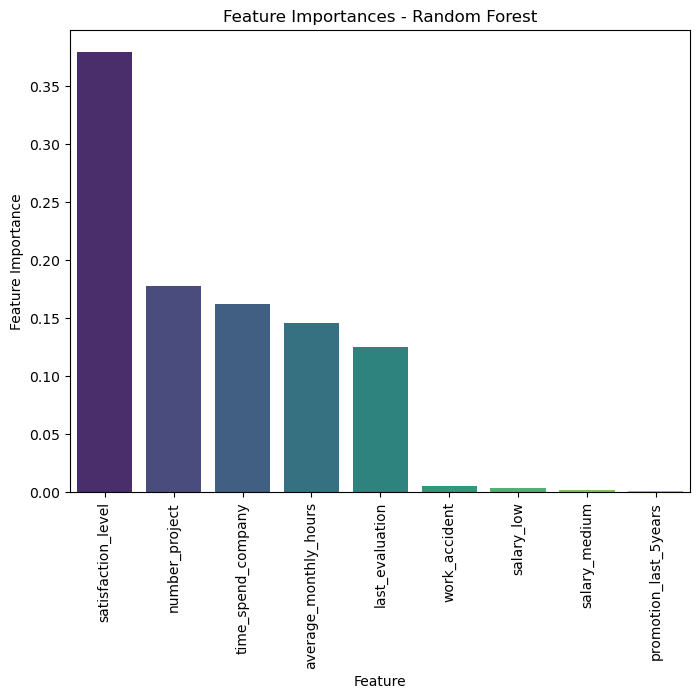

In [68]:
feature_names = X_train.columns.tolist()

# Create a DataFrame for easier plotting
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(y='Importance', x='Feature', data=importances_df, palette='viridis',
            order=importances_df.Feature)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances - Random Forest')
plt.xticks(rotation = 90)
plt.show()

In [69]:
feature_names = df1.columns.tolist()

In [70]:
feature_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

### What key insights emerged from your model(s)?
- Random forest outperforms Logistic regression model as expected. Satisfaction_level is seen as the most important factor in deciding whether an employee will stay or leave in both models.

### What business recommendations do you propose based on the models built?
- Consider random Forest model to predict which employees are likely to leave and perhaps give them special attention in order to retain them.

### What potential recommendations would you make to your manager/company?
- I would suggest taking a survey among the employees to understand what causes low satisfaction level and take measures based on that to increase their satisfaction.

### Do you think your model could be improved? Why or why not? How?
- Testing more hyperparameters to find the most ideal one could improve the model.

### Given what you know about the data and the models you were using, what other questions could you address for the team?
- Employee retention does not depend on department so same measures can applied to every department.




## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Random Forest model performs really well with 98.37 % accuracy which is much higher than logistic regression model.
The model result summary for Random forest is:
- Accuracy: 98.37%
- Precision: 98.91%
- Recall: 91.21 %
- F1 Score: 94.9 %

### Conclusion, Recommendations, Next Steps

Based on Random forest model, following recommendations can be made:

- Introduce new measures to improve employee satisfaction levels. Perhaps a paid vacation once an year or an office party.

- High number of projects on one employee should be avoided if possible.

- Employees working high number of hours may be feeling burned out. Take measures to reduce the work hours for high working hours employees.

- Older employees may be leaving the company because they feel stale in job or not satisfied. They should be surveyed or interviewed to understand why they are leaving the company and what could be done better for them.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.